<a href="https://colab.research.google.com/github/JuanContreras16/Boson-Stars/blob/main/T2_Solitones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Ec. Dinámica para un vortice global.
## Para n = 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Valor de f(0):  1.0




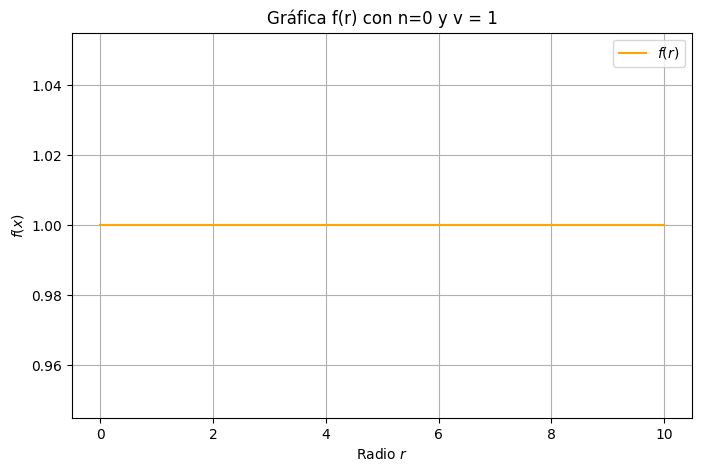

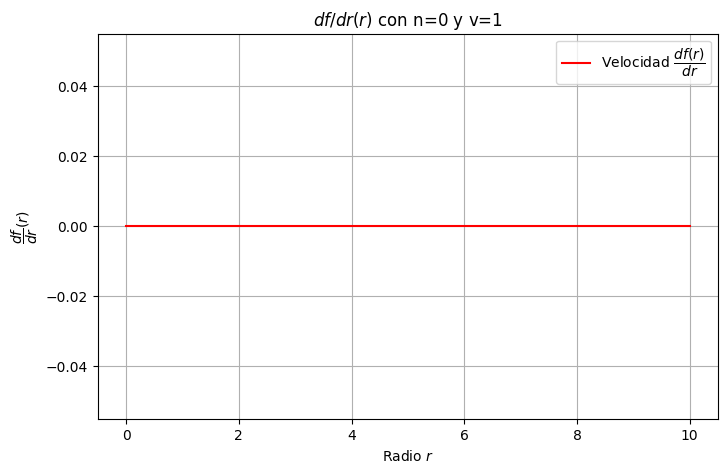

In [9]:
nu=1
l=1

# Definimos el sistema de ecuaciones diferenciales de primer orden
def system(r,y):
  f, v = y
  if r==0:
    dfdr = 0
    dvdr = 0
  else:
    dfdr = v
    dvdr = -v/r + l*(f**2 - nu**2)*f
  return np.array([dfdr, dvdr])

#Implementacion del método de Runge-Kutta
def runge_kutta(f, y0, a, b, npt):
  h = (b-a)/(npt-1)
  x = np.linspace(a, b, npt)
  ysol = np.zeros((npt, len(y0)))
  ysol[0,:] = y0

  for i in range(1, npt):
    k1 = h * f(x[i-1], ysol[i-1, :])
    k2 = h * f(x[i-1] + h/2, ysol[i-1, :] + k1/2)
    k3 = h * f(x[i-1] + h/2, ysol[i-1, :] + k2/2)
    k4 = h * f(x[i-1] + h, ysol[i-1, :] + k3)
    ysol[i, :] = ysol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

  return x, ysol

#Intervalo
a=0
b=10
npt=500

#Método de shooting para valor inicial f(r=0)
def shoot(f_m, f_M, nu, a, b, tol=1e-14):
  while True:
    h = (f_m + f_M)/2
    y0 = [h, 0]
    r, sol = runge_kutta(system, y0, a, b, npt)
    if abs(sol[-1, 0] - nu) < tol:
      return h
    if sol[-1, 0] < nu:
      f_m = h
    else:
      f_M = h
    if abs(f_M - f_m) < tol:
      return h

f_m=nu-10
f_M=nu+10
h = shoot(f_m, f_M, nu, a, b)
print('Valor de f(0): ', h)
print('\n')

r, ysol = runge_kutta(system, [h, 0], a, b, npt)
f = ysol[:, 0]
v = ysol[:, 1]


# Graficar
plt.figure(figsize=(8,5))
plt.plot(r, f, c='orange', label='$f(r)$')
#plt.plot(t, v, label='Velocidad $\dfrac{d\phi(x)}{dt}$', linestyle='dashed')
plt.title('Gráfica f(r) con n=0 y v = 1')
plt.xlabel('Radio $r$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()

# Graficar
print('\n')
plt.figure(figsize=(8,5))
#plt.plot(t, x, label='Posición $\phi(x)$')
plt.plot(r, v, c='red', label='Velocidad $\dfrac{df(r)}{dr}$')
plt.title('$df/dr(r)$ con n=0 y v=1')
plt.xlabel('Radio $r$')
plt.ylabel('$\dfrac{df}{dr}(r)$')
plt.legend()
plt.grid()
plt.show()

# Calculamos ahora la densidad de energía para n=0

Recordando que la densidad de energía estará dada como
$$\rho = v^2+\frac{l}{2}(f^2-\nu^2)^2$$

La energia con n=0 es E=  0.0




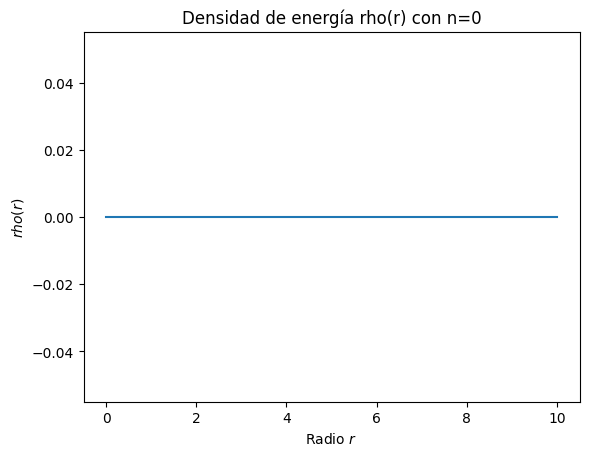

In [ ]:
#Definimos la densidad de energía
rho = v**2 + (l/2)*(f**2 - nu**2)**2

#Calulamos entonces la energía
E=np.trapz(rho,r)
print('La energia con n=0 es E= ',E)
print('\n')

#Gráfica de la densidad
plt.plot(r,rho)
plt.xlabel('Radio $r$')
plt.ylabel('$rho(r)$')
plt.title('Densidad de energía rho(r) con n=0')
plt.show()

## Para n=1

<ipython-input-47-b9bf0826eaea>:14: RuntimeWarning: overflow encountered in scalar multiply
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f
<ipython-input-47-b9bf0826eaea>:14: RuntimeWarning: overflow encountered in scalar power
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f
<ipython-input-47-b9bf0826eaea>:14: RuntimeWarning: invalid value encountered in scalar add
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f


Valor de v(0):  0.5831843281890681




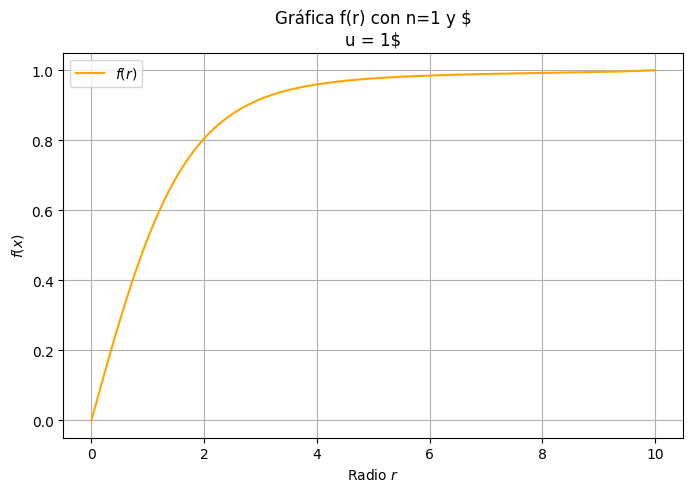

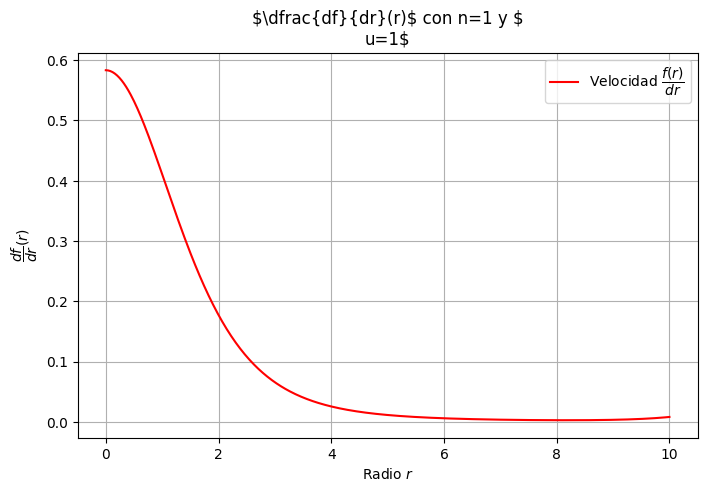

In [ ]:
#Definimos las constantes

nu=1
l=1

# Definimos el sistema de ecuaciones diferenciales de primer orden
def system(r,y):
  f, v = y
  if r==0:
    dfdr = v
    dvdr = 0
  else:
    dfdr = v
    dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f
  return np.array([dfdr, dvdr])

#Implementacion del método de Runge-Kutta
def runge_kutta(f, y0, a, b, npt):
  h = (b-a)/(npt-1)
  x = np.linspace(a, b, npt)
  ysol = np.zeros((npt, len(y0)))
  ysol[0,:] = y0

  for i in range(1, npt):
    k1 = h * f(x[i-1], ysol[i-1, :])
    k2 = h * f(x[i-1] + h/2, ysol[i-1, :] + k1/2)
    k3 = h * f(x[i-1] + h/2, ysol[i-1, :] + k2/2)
    k4 = h * f(x[i-1] + h, ysol[i-1, :] + k3)
    ysol[i, :] = ysol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

  return x, ysol

#Intervalo
a=0
b=10
npt=500

#Definimos las condiciones de frontera
f_a = 0      # r = a
f_b = nu     # r = b

def shoot1(v_m, v_M, nu, a, b, tol=1e-14):
  while True:
    v = (v_m + v_M)/2
    y0 = [f_a, v]
    r, ysol = runge_kutta(system, y0, a, b, npt)

    if abs(ysol[-1, 0] - nu) < tol:
      return v

    if ysol[-1, 0] < nu:
      v_m = v
    else:
      v_M = v

    if abs(v_M - v_m) < tol:
      return v

v_m=0
v_M=10
dfdr=0

v = shoot1(v_m, v_M, nu, a, b)
y0 = [f_a, v]
print('Valor de v(0): ', v)
print('\n')

r, ysol = runge_kutta(system, y0, a, b, npt)
f = ysol[:, 0]
v = ysol[:, 1]

# Graficar
plt.figure(figsize=(8,5))
plt.plot(r, f, c='orange', label='$f(r)$')
#plt.plot(t, v, label='Velocidad $\dfrac{d\phi(x)}{dt}$', linestyle='dashed')
plt.title('Gráfica f(r) con n=1 y $\nu = 1$')
plt.xlabel('Radio $r$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()

# Graficar
print('\n')
plt.figure(figsize=(8,5))
#plt.plot(t, x, label='Posición $\phi(x)$')
plt.plot(r, v, c='red', label='Velocidad $\dfrac{f(r)}{dr}$')
plt.title('$\dfrac{df}{dr}(r)$ con n=1 y $\nu=1$')
plt.xlabel('Radio $r$')
plt.ylabel('$\dfrac{df}{dr}(r)$')
plt.legend()
plt.grid()
plt.show()

<ipython-input-46-17ecde23c4bc>:2: RuntimeWarning: invalid value encountered in divide
  rho = v**2 + f/r**2 + (l/2)*(f**2 - nu**2)**2


La energia con n=1 es $E=\infty $




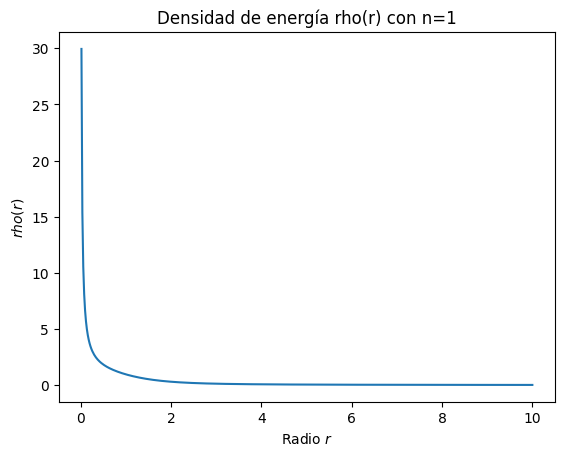

In [ ]:
#Definimos la densidad de energía
rho = v**2 + f/r**2 + (l/2)*(f**2 - nu**2)**2

#Calulamos entonces la energía
E=np.trapz(rho,r)
if np.isnan(E):
  print('La energia con n=1 es $E=\infty $')
  print('\n')
else:
  print('La energia con n=1 es E= ',E)
  print('\n')

#Gráfica de la densidad
plt.plot(r,rho)
plt.xlabel('Radio $r$')
plt.ylabel('$rho(r)$')
plt.title('Densidad de energía rho(r) con n=1')
plt.show()

## Para n = 2

<ipython-input-52-d8c293207ff8>:14: RuntimeWarning: overflow encountered in scalar multiply
  dvdr = -5*v/r + l*(r**4*f**2 - nu**2)*f
<ipython-input-52-d8c293207ff8>:14: RuntimeWarning: overflow encountered in scalar power
  dvdr = -5*v/r + l*(r**4*f**2 - nu**2)*f
<ipython-input-52-d8c293207ff8>:14: RuntimeWarning: invalid value encountered in scalar add
  dvdr = -5*v/r + l*(r**4*f**2 - nu**2)*f


Valor de f(0):  0.15310012761843517




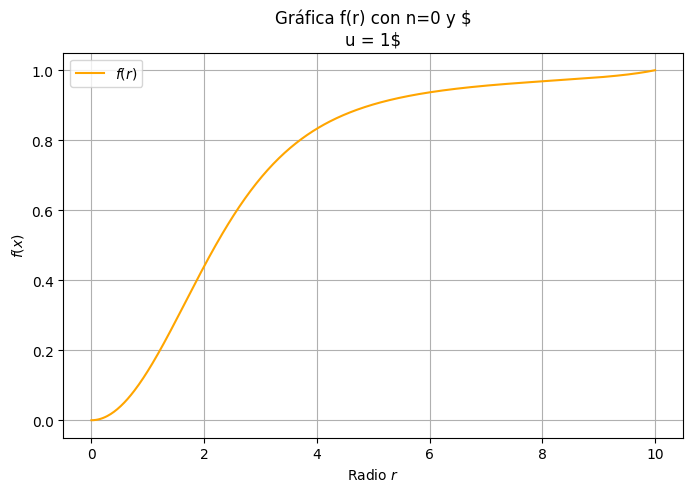

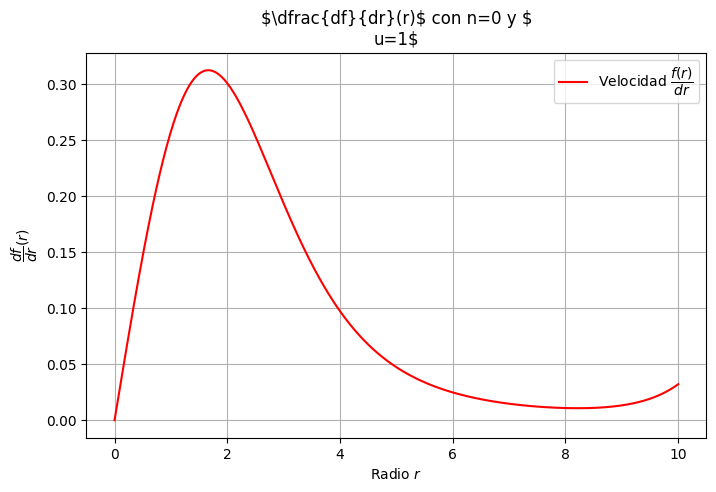

In [ ]:
#Definimos las constantes

nu=1
l=1

# Definimos el sistema de ecuaciones diferenciales de primer orden
def system(r,y):
  f, v = y
  if r==0:
    dfdr = 0
    dvdr = 0
  else:
    dfdr = v
    dvdr = -5*v/r + l*(r**4*f**2 - nu**2)*f
  return np.array([dfdr, dvdr])

#Implementacion del método de Runge-Kutta
def runge_kutta(f, y0, a, b, npt):
  h = (b-a)/(npt-1)
  x = np.linspace(a, b, npt)
  ysol = np.zeros((npt, len(y0)))
  ysol[0,:] = y0

  for i in range(1, npt):
    k1 = h * f(x[i-1], ysol[i-1, :])
    k2 = h * f(x[i-1] + h/2, ysol[i-1, :] + k1/2)
    k3 = h * f(x[i-1] + h/2, ysol[i-1, :] + k2/2)
    k4 = h * f(x[i-1] + h, ysol[i-1, :] + k3)
    ysol[i, :] = ysol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

  return x, ysol

#Intervalo
a=0
b=10
npt=500

def shoot(f_m, f_M, nu, a, b, tol=1e-14):
  while True:
    h = (f_m + f_M)/2
    y0 = [h, 0]
    r, ysol = runge_kutta(system, y0, a, b, npt)
    if abs(ysol[-1, 0] - nu/b**2) < tol:
      return h
    if ysol[-1, 0] < nu/b**2:
      f_m = h
    else:
      f_M = h
    if abs(f_M - f_m) < tol:
      return h

f_m=0
f_M=5

h = shoot(f_m, f_M, nu, a, b)
print('Valor de f(0): ', h)
print('\n')

r, ysol = runge_kutta(system, [h, 0], a, b, npt)
f = ysol[:, 0]
v = ysol[:, 1]

# Graficar
plt.figure(figsize=(8,5))
plt.plot(r, r**2*f, c='orange', label='$f(r)$')
#plt.plot(t, v, label='Velocidad $\dfrac{d\phi(x)}{dt}$', linestyle='dashed')
plt.title('Gráfica f(r) con n=0 y $\nu = 1$')
plt.xlabel('Radio $r$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()

# Graficar
print('\n')
plt.figure(figsize=(8,5))
#plt.plot(t, x, label='Posición $\phi(x)$')
plt.plot(r, r**2*v + 2*r*f, c='red', label='Velocidad $\dfrac{f(r)}{dr}$')
plt.title('$\dfrac{df}{dr}(r)$ con n=0 y $\nu=1$')
plt.xlabel('Radio $r$')
plt.ylabel('$\dfrac{df}{dr}(r)$')
plt.legend()
plt.grid()
plt.show()

<ipython-input-54-0c8a6e2183a6>:2: RuntimeWarning: divide by zero encountered in divide
  rho = (r**2*v+2*r*f)**2+(l/2)*((r**2*f)**2-nu**2)**2+(4/r**2)*(r**2*f)**2
<ipython-input-54-0c8a6e2183a6>:2: RuntimeWarning: invalid value encountered in multiply
  rho = (r**2*v+2*r*f)**2+(l/2)*((r**2*f)**2-nu**2)**2+(4/r**2)*(r**2*f)**2


La energia con n=2 es $E=\infty $




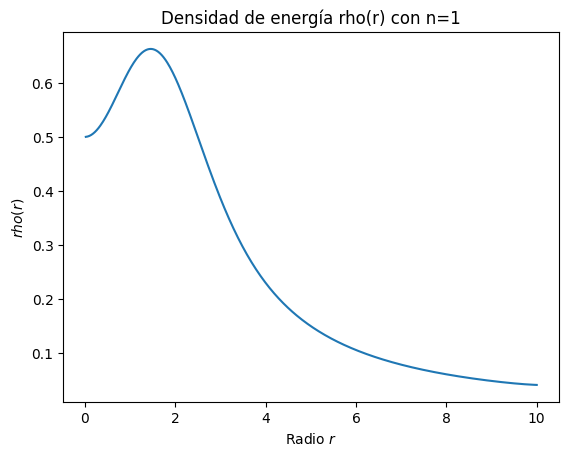

In [ ]:
#Definimos la densidad de energía
rho = (r**2*v+2*r*f)**2+(l/2)*((r**2*f)**2-nu**2)**2+(4/r**2)*(r**2*f)**2

#Calulamos entonces la energía
E=np.trapz(rho,r)
if np.isnan(E):
  print('La energia con n=2 es $E=\infty $')
  print('\n')
else:
  print('La energia con n=2 es E= ',E)
  print('\n')

#Gráfica de la densidad
plt.plot(r,rho)
plt.xlabel('Radio $r$')
plt.ylabel('$rho(r)$')
plt.title('Densidad de energía rho(r) con n=1')
plt.show()